In [1]:
                                                                                                                                                                    import sys
import os
from time import time
import numpy as np
import pandas as pd


import matplotlib

import xgboost as xgb

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, 
                             precision_score, 
                             recall_score, 
                             accuracy_score,
                             classification_report,
                             ConfusionMatrixDisplay, 
                             roc_curve,
                             roc_auc_score)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

In [2]:
train_data = pd.read_csv(r"C:\Users\user\Desktop\Python Programs\Santender\train.csv")
test_data = pd.read_csv(r"C:\Users\user\Desktop\Python Programs\Santender\test.csv")

In [3]:
train_data['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [4]:
## use for spltting up combined train+test data, recording predictions
#labels = train_data['TARGET'].values

#id_test = test_data['ID']
#piv_train = train_data.shape[0]



# Creating a DataFrame with train+test data
df = pd.concat((train_data,test_data.copy()), axis=0, ignore_index=True)

# Removing id
df = df.drop(['ID'], axis=1)

print(df.isnull().sum() / df.shape[0])

df.head()

var3                       0.000000
var15                      0.000000
imp_ent_var16_ult1         0.000000
imp_op_var39_comer_ult1    0.000000
imp_op_var39_comer_ult3    0.000000
                             ...   
saldo_medio_var44_hace3    0.000000
saldo_medio_var44_ult1     0.000000
saldo_medio_var44_ult3     0.000000
var38                      0.000000
TARGET                     0.499335
Length: 370, dtype: float64


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0.0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0.0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0.0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0.0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0.0


In [5]:
np.any(np.isnan(df))
np.all(np.isfinite(df))
#remove rows with any values that are not finite
df = df[np.isfinite(df).all(1)]

In [6]:
df.isna().sum()

var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
imp_op_var39_comer_ult3    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 370, dtype: int64

In [7]:
df.fillna(0)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0.0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0.0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0.0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0.0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0.0
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0.0
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0.0
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0.0


In [8]:
df.isna().sum()

var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
imp_op_var39_comer_ult3    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 370, dtype: int64

In [9]:
df["TARGET"].sum()

3008.0

In [10]:
list(df.columns)

['var3',
 'var15',
 'imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var40_comer_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_sal_var16_ult1',
 'ind_var1_0',
 'ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var5_0',
 'ind_var5',
 'ind_var6_0',
 'ind_var6',
 'ind_var8_0',
 'ind_var8',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13_largo_0',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var13',
 'ind_var14_0',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 'ind_var

In [11]:
X=df[['var3',
 'var15',
 'imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var40_comer_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_sal_var16_ult1',
 'ind_var1_0',
 'ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var5_0',
 'ind_var5',
 'ind_var6_0',
 'ind_var6',
 'ind_var8_0',
 'ind_var8',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13_largo_0',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var13',
 'ind_var14_0',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var26',
 'ind_var25_0',
 'ind_var25',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var30',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var37_cte',
 'ind_var37_0',
 'ind_var37',
 'ind_var39_0',
 'ind_var40_0',
 'ind_var40',
 'ind_var41_0',
 'ind_var41',
 'ind_var39',
 'ind_var44_0',
 'ind_var44',
 'ind_var46_0',
 'ind_var46',
 'num_var1_0',
 'num_var1',
 'num_var4',
 'num_var5_0',
 'num_var5',
 'num_var6_0',
 'num_var6',
 'num_var8_0',
 'num_var8',
 'num_var12_0',
 'num_var12',
 'num_var13_0',
 'num_var13_corto_0',
 'num_var13_corto',
 'num_var13_largo_0',
 'num_var13_largo',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var13',
 'num_var14_0',
 'num_var14',
 'num_var17_0',
 'num_var17',
 'num_var18_0',
 'num_var18',
 'num_var20_0',
 'num_var20',
 'num_var24_0',
 'num_var24',
 'num_var26_0',
 'num_var26',
 'num_var25_0',
 'num_var25',
 'num_op_var40_hace2',
 'num_op_var40_hace3',
 'num_op_var40_ult1',
 'num_op_var40_ult3',
 'num_op_var41_hace2',
 'num_op_var41_hace3',
 'num_op_var41_ult1',
 'num_op_var41_ult3',
 'num_op_var39_hace2',
 'num_op_var39_hace3',
 'num_op_var39_ult1',
 'num_op_var39_ult3',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var29_0',
 'num_var29',
 'num_var30_0',
 'num_var30',
 'num_var31_0',
 'num_var31',
 'num_var32_0',
 'num_var32',
 'num_var33_0',
 'num_var33',
 'num_var34_0',
 'num_var34',
 'num_var35',
 'num_var37_med_ult2',
 'num_var37_0',
 'num_var37',
 'num_var39_0',
 'num_var40_0',
 'num_var40',
 'num_var41_0',
 'num_var41',
 'num_var39',
 'num_var42_0',
 'num_var42',
 'num_var44_0',
 'num_var44',
 'num_var46_0',
 'num_var46',
 'saldo_var1',
 'saldo_var5',
 'saldo_var6',
 'saldo_var8',
 'saldo_var12',
 'saldo_var13_corto',
 'saldo_var13_largo',
 'saldo_var13_medio',
 'saldo_var13',
 'saldo_var14',
 'saldo_var17',
 'saldo_var18',
 'saldo_var20',
 'saldo_var24',
 'saldo_var26',
 'saldo_var25',
 'saldo_var28',
 'saldo_var27',
 'saldo_var29',
 'saldo_var30',
 'saldo_var31',
 'saldo_var32',
 'saldo_var33',
 'saldo_var34',
 'saldo_var37',
 'saldo_var40',
 'saldo_var41',
 'saldo_var42',
 'saldo_var44',
 'saldo_var46',
 'var36',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_imp_aport_var13_1y3',
 'delta_imp_aport_var17_1y3',
 'delta_imp_aport_var33_1y3',
 'delta_imp_compra_var44_1y3',
 'delta_imp_reemb_var13_1y3',
 'delta_imp_reemb_var17_1y3',
 'delta_imp_reemb_var33_1y3',
 'delta_imp_trasp_var17_in_1y3',
 'delta_imp_trasp_var17_out_1y3',
 'delta_imp_trasp_var33_in_1y3',
 'delta_imp_trasp_var33_out_1y3',
 'delta_imp_venta_var44_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_aport_var13_hace3',
 'imp_aport_var13_ult1',
 'imp_aport_var17_hace3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_aport_var33_ult1',
 'imp_var7_emit_ult1',
 'imp_var7_recib_ult1',
 'imp_compra_var44_hace3',
 'imp_compra_var44_ult1',
 'imp_reemb_var13_hace3',
 'imp_reemb_var13_ult1',
 'imp_reemb_var17_hace3',
 'imp_reemb_var17_ult1',
 'imp_reemb_var33_hace3',
 'imp_reemb_var33_ult1',
 'imp_var43_emit_ult1',
 'imp_trans_var37_ult1',
 'imp_trasp_var17_in_hace3',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var17_out_ult1',
 'imp_trasp_var33_in_hace3',
 'imp_trasp_var33_in_ult1',
 'imp_trasp_var33_out_hace3',
 'imp_trasp_var33_out_ult1',
 'imp_venta_var44_hace3',
 'imp_venta_var44_ult1',
 'ind_var7_emit_ult1',
 'ind_var7_recib_ult1',
 'ind_var10_ult1',
 'ind_var10cte_ult1',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'ind_var43_emit_ult1',
 'ind_var43_recib_ult1',
 'var21',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_aport_var13_hace3',
 'num_aport_var13_ult1',
 'num_aport_var17_hace3',
 'num_aport_var17_ult1',
 'num_aport_var33_hace3',
 'num_aport_var33_ult1',
 'num_var7_emit_ult1',
 'num_var7_recib_ult1',
 'num_compra_var44_hace3',
 'num_compra_var44_ult1',
 'num_ent_var16_ult1',
 'num_var22_hace2',
 'num_var22_hace3',
 'num_var22_ult1',
 'num_var22_ult3',
 'num_med_var22_ult3',
 'num_med_var45_ult3',
 'num_meses_var5_ult3',
 'num_meses_var8_ult3',
 'num_meses_var12_ult3',
 'num_meses_var13_corto_ult3',
 'num_meses_var13_largo_ult3',
 'num_meses_var13_medio_ult3',
 'num_meses_var17_ult3',
 'num_meses_var29_ult3',
 'num_meses_var33_ult3',
 'num_meses_var39_vig_ult3',
 'num_meses_var44_ult3',
 'num_op_var39_comer_ult1',
 'num_op_var39_comer_ult3',
 'num_op_var40_comer_ult1',
 'num_op_var40_comer_ult3',
 'num_op_var40_efect_ult1',
 'num_op_var40_efect_ult3',
 'num_op_var41_comer_ult1',
 'num_op_var41_comer_ult3',
 'num_op_var41_efect_ult1',
 'num_op_var41_efect_ult3',
 'num_op_var39_efect_ult1',
 'num_op_var39_efect_ult3',
 'num_reemb_var13_hace3',
 'num_reemb_var13_ult1',
 'num_reemb_var17_hace3',
 'num_reemb_var17_ult1',
 'num_reemb_var33_hace3',
 'num_reemb_var33_ult1',
 'num_sal_var16_ult1',
 'num_var43_emit_ult1',
 'num_var43_recib_ult1',
 'num_trasp_var11_ult1',
 'num_trasp_var17_in_hace3',
 'num_trasp_var17_in_ult1',
 'num_trasp_var17_out_hace3',
 'num_trasp_var17_out_ult1',
 'num_trasp_var33_in_hace3',
 'num_trasp_var33_in_ult1',
 'num_trasp_var33_out_hace3',
 'num_trasp_var33_out_ult1',
 'num_venta_var44_hace3',
 'num_venta_var44_ult1',
 'num_var45_hace2',
 'num_var45_hace3',
 'num_var45_ult1',
 'num_var45_ult3',
 'saldo_var2_ult1',
 'saldo_medio_var5_hace2',
 'saldo_medio_var5_hace3',
 'saldo_medio_var5_ult1',
 'saldo_medio_var5_ult3',
 'saldo_medio_var8_hace2',
 'saldo_medio_var8_hace3',
 'saldo_medio_var8_ult1',
 'saldo_medio_var8_ult3',
 'saldo_medio_var12_hace2',
 'saldo_medio_var12_hace3',
 'saldo_medio_var12_ult1',
 'saldo_medio_var12_ult3',
 'saldo_medio_var13_corto_hace2',
 'saldo_medio_var13_corto_hace3',
 'saldo_medio_var13_corto_ult1',
 'saldo_medio_var13_corto_ult3',
 'saldo_medio_var13_largo_hace2',
 'saldo_medio_var13_largo_hace3',
 'saldo_medio_var13_largo_ult1',
 'saldo_medio_var13_largo_ult3',
 'saldo_medio_var13_medio_hace2',
 'saldo_medio_var13_medio_hace3',
 'saldo_medio_var13_medio_ult1',
 'saldo_medio_var13_medio_ult3',
 'saldo_medio_var17_hace2',
 'saldo_medio_var17_hace3',
 'saldo_medio_var17_ult1',
 'saldo_medio_var17_ult3',
 'saldo_medio_var29_hace2',
 'saldo_medio_var29_hace3',
 'saldo_medio_var29_ult1',
 'saldo_medio_var29_ult3',
 'saldo_medio_var33_hace2',
 'saldo_medio_var33_hace3',
 'saldo_medio_var33_ult1',
 'saldo_medio_var33_ult3',
 'saldo_medio_var44_hace2',
 'saldo_medio_var44_hace3',
 'saldo_medio_var44_ult1',
 'saldo_medio_var44_ult3',
 'var38']]

In [12]:
y=df["TARGET"]

In [13]:
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.3,random_state=42)

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import time
from scipy import stats
import warnings
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
from sklearn import metrics
from math import sqrt


sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [15]:
key= ['LogisticRegression', 'DecisionTreeClassifier', 'DecisionTreeRegressor', 'GaussianNB', 'XGBClassifier', 'LGBMClassifier', 'KNeighborsClassifier','RandomForestClassifier','SVC', 'CatBoostClassifier']

value= [LogisticRegression(), DecisionTreeClassifier(), DecisionTreeRegressor(), GaussianNB(), XGBClassifier(), LGBMClassifier(), KNeighborsClassifier(), RandomForestClassifier(), SVC(), CatBoostClassifier(verbose=False)]

models= dict(zip(key, value))

#key = ['RandomForestClassifier, 'SVC', 'CatBoostClassifier']
#values = [RandomForestClassifier(), SVC(), CatBoostClassifier(verbose=False)]
#models taking time: RandomForestClassifier, CatBoostClassifier, SVC

In [16]:
models

{'LogisticRegression': LogisticRegression(),
 'DecisionTreeClassifier': DecisionTreeClassifier(),
 'DecisionTreeRegressor': DecisionTreeRegressor(),
 'GaussianNB': GaussianNB(),
 'XGBClassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'LGBMClassifier': LGBMClassifier(),
 'KN

In [17]:
scores=[]
for key,value in models.items():
    score= -1*cross_val_score(value, X,y, cv=5, scoring='neg_mean_absolute_error')
    scores.append(score)
    print(key, score.mean())

LogisticRegression 0.03995001315443304
DecisionTreeClassifier 0.07144172586161536
DecisionTreeRegressor 0.07444875018974598
GaussianNB 0.9348855564325177
XGBClassifier 0.03997632202052091
LGBMClassifier 0.03968692449355433
KNeighborsClassifier 0.04373848987108656
RandomForestClassifier 0.04697448039989477
SVC 0.03956853459615891
CatBoostClassifier 0.03981846882399369


In [18]:
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= value.score(X_test,y_test)
    
    accuracy_scores.append(accuracy)
    print(key, accuracy)

LogisticRegression 0.9598789792159957
DecisionTreeClassifier 0.9298868718758222
DecisionTreeRegressor -0.7970414731688789
GaussianNB 0.0675699377356836
XGBClassifier 0.9595720424449706
LGBMClassifier 0.9594843462246777
KNeighborsClassifier 0.9580373585898447
RandomForestClassifier 0.9523809523809523
SVC 0.9598789792159957
CatBoostClassifier 0.9595281943348242


In [19]:
logis= LogisticRegression(random_state=42)
logis.fit(X_train,y_train)
y_pred= logis.predict(X_test)

conf_m = confusion_matrix(y_test,y_pred)
print('The confusion Matrix: \n', conf_m)

clas_report = classification_report(y_test,y_pred)
print('\n\n\n Classification report: \n', clas_report)

p_pred = logis.predict_proba(X)
print('\n\n\n The predicted probability: \n',p_pred)

y_pred = logis.predict(X)
print('\n\n\n Model Prediction: \n',y_pred)

score_ = logis.score(X, y)
print('\n\n\n Model Score :\n',score)

The confusion Matrix: 
 [[21891     0]
 [  915     0]]



 Classification report: 
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     21891
         1.0       0.00      0.00      0.00       915

    accuracy                           0.96     22806
   macro avg       0.48      0.50      0.49     22806
weighted avg       0.92      0.96      0.94     22806




 The predicted probability: 
 [[0.78182956 0.21817044]
 [0.83307685 0.16692315]
 [0.89954092 0.10045908]
 ...
 [0.91759242 0.08240758]
 [0.93956079 0.06043921]
 [0.97852519 0.02147481]]



 Model Prediction: 
 [0. 0. 0. ... 0. 0. 0.]



 Model Score :
 [0.0399237  0.03985793 0.04005525 0.03952907 0.03972639]


In [20]:
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression(verbose = False)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
logis_clf = grid_search.fit(X, y)


In [21]:
logis_clf.best_estimator_

LogisticRegression(C=0.01, solver='newton-cg', verbose=False)

In [22]:
logis_clf.best_score_

0.9510000000000001

In [23]:
logis_clf.best_estimator_.fit(X_train,y_train)
y_pred= logis_clf.best_estimator_.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21889     2]
 [  915     0]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     21891
         1.0       0.00      0.00      0.00       915

    accuracy                           0.96     22806
   macro avg       0.48      0.50      0.49     22806
weighted avg       0.92      0.96      0.94     22806



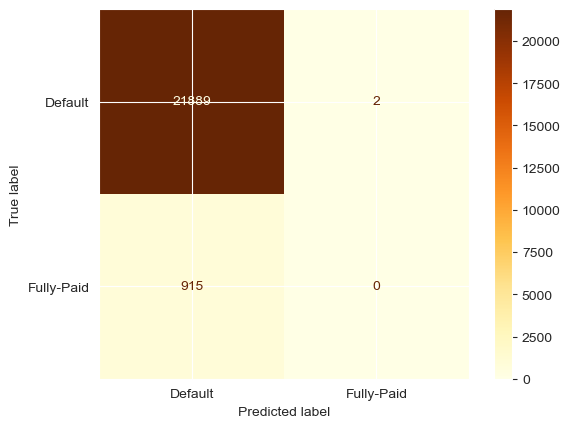

In [24]:
disp = plot_confusion_matrix(
    logis_clf, X_test, y_test, 
    cmap='YlOrBr', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

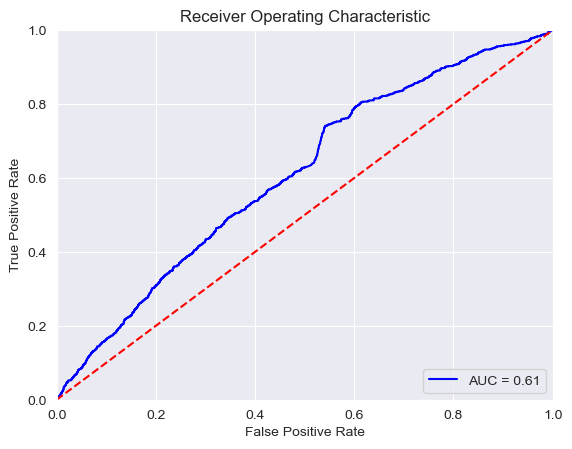

In [25]:
probs = logis_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
lgbm= LGBMClassifier(random_state=42)
lgbm.fit(X_train,y_train)
y_pred= lgbm.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[21878    13]
 [  911     4]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     21891
         1.0       0.24      0.00      0.01       915

    accuracy                           0.96     22806
   macro avg       0.60      0.50      0.49     22806
weighted avg       0.93      0.96      0.94     22806



In [27]:
lgbm_params = {
 'colsample_bytree': [0.6,0.8,1.0],
 'learning_rate': [0.033,0.057,0.1],
 'max_depth': [3,4,5,6],
 'min_child_weight': [1,5,10,12],
 'n_estimators': [150,300,450,600],
 'num_leaves': [10,20,30],
 'subsample': [0.6,0.8,1.0]
 }

lgbm= LGBMClassifier(**lgbm_params)

lgbm

LGBMClassifier(colsample_bytree=[0.6, 0.8, 1.0],
               learning_rate=[0.033, 0.057, 0.1], max_depth=[3, 4, 5, 6],
               min_child_weight=[1, 5, 10, 12],
               n_estimators=[150, 300, 450, 600], num_leaves=[10, 20, 30],
               subsample=[0.6, 0.8, 1.0])

In [28]:
lgbm_clf= RandomizedSearchCV(lgbm, param_distributions=lgbm_params, cv = 5, n_iter=5, verbose=1)

lgbm_clf.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(colsample_bytree=[0.6, 0.8, 1.0],
                                            learning_rate=[0.033, 0.057, 0.1],
                                            max_depth=[3, 4, 5, 6],
                                            min_child_weight=[1, 5, 10, 12],
                                            n_estimators=[150, 300, 450, 600],
                                            num_leaves=[10, 20, 30],
                                            subsample=[0.6, 0.8, 1.0]),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.033, 0.057, 0.1],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 5, 10, 12],
                                        'n_estimators': [150, 300, 450, 600],
                                        'num_lea

In [29]:
lgbm_clf.best_estimator_

LGBMClassifier(colsample_bytree=0.8, max_depth=4, min_child_weight=5,
               n_estimators=450, num_leaves=20, subsample=0.6)

In [30]:
lgbm_clf.best_score_

0.933

In [31]:
lgbm_clf.best_estimator_.fit(X_train,y_train)
y_pred= lgbm_clf.best_estimator_.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21877    14]
 [  908     7]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     21891
         1.0       0.33      0.01      0.01       915

    accuracy                           0.96     22806
   macro avg       0.65      0.50      0.50     22806
weighted avg       0.94      0.96      0.94     22806



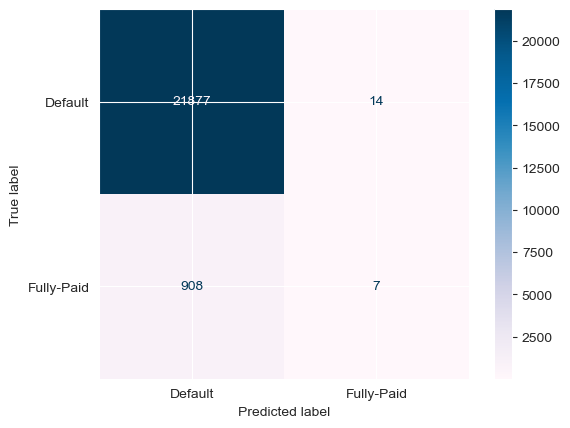

In [32]:
disp = plot_confusion_matrix(
    lgbm_clf, X_test, y_test, 
    cmap='PuBu', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

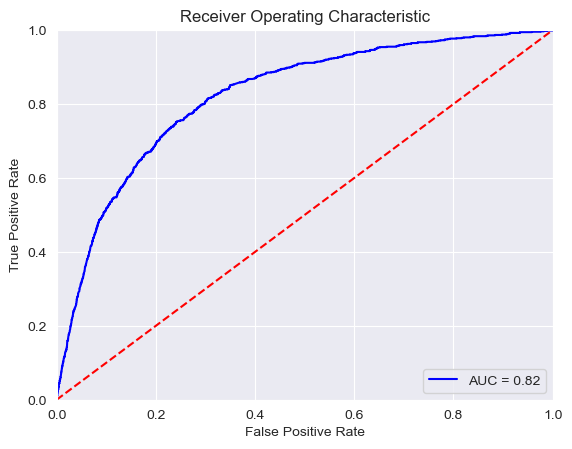

In [33]:
probs = lgbm_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()